2.1 Introduction to Outliers

Outliers are data points that significantly differ from other observations in a dataset. They may occur due to variability in the data, measurement errors, or special cases that represent significant deviations from the norm. Properly identifying and handling outliers is crucial for accurate data analysis and modeling, as they can skew results and impact the performance of statistical models.

Importance of Handling Outliers:

Impact on Statistical Measures: Outliers can affect mean, variance, and other statistical measures, leading to misleading conclusions.
Model Performance: Outliers can distort the training of machine learning models, leading to poor performance or inaccurate predictions.
Data Integrity: Handling outliers ensures the dataset reflects true patterns and trends, enhancing the reliability of analyses and results.
Types of Outliers:

Univariate Outliers: Deviations in a single variable. Example: A temperature reading of 100°C in a dataset where most temperatures are between 20°C and 30°C.
Multivariate Outliers: Deviations that occur in the context of multiple variables. Example: A combination of age and income that is far outside the normal range for a population.
Common Causes of Outliers:

Measurement Errors: Errors in data collection or entry.
Data Entry Errors: Typographical errors or incorrect data input.
Variability in the Data: Natural variations in data, especially in large datasets.
Special Cases: Genuine cases that are distinct from the norm but valid. For example, a high-value transaction in a financial dataset might be an outlier but not an error.
Approaches to Handling Outliers:

Identification: Use statistical methods, visualizations, and domain knowledge to identify outliers.
Handling: Depending on the context, outliers can be removed, transformed, or capped to reduce their impact on analyses and models.


2.2 Definition

Outliers: Outliers are data points that significantly differ from the majority of the data. They can arise from variability in the data or may indicate measurement errors. Proper handling of outliers is crucial as they can skew statistical analyses and models.

Goals

Identify Outliers: Detect outliers using various statistical methods and visualization techniques.
Handle Outliers: Decide on methods to manage outliers, including removal, transformation, or capping.

Description

Handling outliers involves identifying data points that deviate significantly from the rest of the data and deciding on appropriate actions to manage them. Common techniques include statistical methods (Z-score, IQR), visual methods (box plots), and more advanced methods (robust statistics).

2.3 Techniques

1. Z-Score Method
   - Description: Calculates the Z-score for each data point to determine how many standard deviations away from the mean a data point is. Data points with Z-scores beyond a certain threshold (e.g., ±3) are considered outliers.
   - Example: df['column'].apply(lambda x: (x - mean) / std)

2. Interquartile Range (IQR) Method
   - Description: Identifies outliers based on the interquartile range (IQR). Data points outside 1.5 * IQR from the Q1 (25th percentile) or Q3 (75th percentile) are considered outliers.
   - Example: df[(df['column'] < (Q1 - 1.5 * IQR)) | (df['column'] > (Q3 + 1.5 * IQR))]

3. Box Plot Visualization
   - Description: Uses box plots to visually identify outliers as points outside the "whiskers" of the plot.
   - Example: sns.boxplot(x=df['column'])

4. Capping (Winsorization)
   - Description: Limits extreme values to a specified percentile range to reduce the impact of outliers.
   - Example: df['column'] = np.where(df['column'] > upper_limit, upper_limit, df['column'])

5. Transformation
   - Description: Applies transformations like logarithmic or square root to reduce the effect of outliers.
   - Example: df['column'] = np.log1p(df['column'])


2.3.1 Z-Score

The Z-score, also known as the standard score, is a statistical measurement that describes a value's relation to the mean of a group of values. It is expressed in terms of standard deviations from the mean. A Z-score indicates how many standard deviations an element is from the mean. A Z-score can be positive or negative, with a positive score indicating the value is above the mean and a negative score indicating it is below the mean.

Using Z-scores to detect outliers involves calculating the Z-score for each data point and identifying those that lie beyond a certain threshold, commonly ±3 standard deviations from the mean. These data points are considered outliers as they deviate significantly from the rest of the dataset.

In [1]:
import pandas as pd
import numpy as np

# Read the data from the specified location
df = pd.read_csv('D:/Projects/Data-cleaning-series/Chapter02 Handling Outliers/Products.csv')

# Display the initial DataFrame
print("Initial DataFrame:")
print(df.to_string(index=False))

# Calculate Z-scores for the 'Price' column
mean_price = df['Price'].mean()
std_price = df['Price'].std()
df['Price_Z_Score'] = (df['Price'] - mean_price) / std_price

# Identify outliers
df_outliers_zscore = df[df['Price_Z_Score'].abs() > 3]

# Display the DataFrame with identified outliers
print("\nDataFrame with Outliers Identified by Z-Score:")
print(df_outliers_zscore.to_string(index=False))


Initial DataFrame:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          2     Widget B  29.99 Electronics    NaN                      NaN
          3          NaN  15.00  Home Goods   50.0      Durable and stylish
          4     Widget D    NaN  Home Goods  200.0       A versatile widget
          5     Widget E   9.99         NaN   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          7     Widget G    NaN     Kitchen  150.0     Multi-purpose widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
          9     Widget I    NaN Electronics    NaN        Advanced features
         10     Widget J  49.99 Electronics   60.0            Best in class

DataFrame with Outliers Identified by Z-Score:
Empty DataFrame
Columns: [Product ID, Product Name, Price, Category, Stock, Description, Price_Z_

Explanation:

Read the Data: Load the dataset from the specified location using pd.read_csv().

Initial Display: Display the DataFrame to see the data before applying the Z-score method.

Calculate Z-scores: Compute the Z-scores for the 'Price' column to determine how many standard deviations each data point is from the mean.

Identify Outliers: Filter out the rows where the absolute Z-score is greater than 3, indicating these are outliers.

Final Display: Display the DataFrame with the identified outliers.

This method is useful for detecting outliers in normally distributed data, allowing for further analysis and appropriate handling of these anomalies.

2.3.2 IQR Technique

The Interquartile Range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. It effectively captures the range within which the middle 50% of data points lie. Outliers are identified as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is robust and less sensitive to extreme values than the Z-score method.

In [2]:
import pandas as pd
import numpy as np

# Read the data from the specified location
df = pd.read_csv('D:/Projects/Data-cleaning-series/Chapter02 Handling Outliers/Products.csv')

# Display the initial DataFrame
print("Initial DataFrame:")
print(df.to_string(index=False))

# Calculate IQR for the 'Price' column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df_outliers_iqr = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Display the DataFrame with identified outliers
print("\nDataFrame with Outliers Identified by IQR:")
print(df_outliers_iqr.to_string(index=False))


Initial DataFrame:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          2     Widget B  29.99 Electronics    NaN                      NaN
          3          NaN  15.00  Home Goods   50.0      Durable and stylish
          4     Widget D    NaN  Home Goods  200.0       A versatile widget
          5     Widget E   9.99         NaN   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          7     Widget G    NaN     Kitchen  150.0     Multi-purpose widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
          9     Widget I    NaN Electronics    NaN        Advanced features
         10     Widget J  49.99 Electronics   60.0            Best in class

DataFrame with Outliers Identified by IQR:
Empty DataFrame
Columns: [Product ID, Product Name, Price, Category, Stock, Description]
Index: []


Explanation:

Read the Data: Load the dataset from the specified location using pd.read_csv().

Initial Display: Display the DataFrame to see the data before applying the IQR method.

Calculate IQR: Compute the first quartile (Q1), third quartile (Q3), and IQR for the 'Price' column.

Determine Outlier Bounds: Calculate the lower and upper bounds for outliers using the IQR.

Identify Outliers: Filter out the rows where 'Price' falls below the lower bound or above the upper bound.

Final Display: Display the DataFrame with the identified outliers.

The IQR method is particularly effective for skewed data distributions and provides a clear boundary for identifying extreme values.

2.3.3 Box Plot Visualization

A box plot, also known as a whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Box plots are useful for identifying outliers, as they visually represent data points that fall outside the whiskers (typically 1.5 * IQR from the quartiles).

Initial DataFrame:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          2     Widget B  29.99 Electronics    NaN                      NaN
          3          NaN  15.00  Home Goods   50.0      Durable and stylish
          4     Widget D    NaN  Home Goods  200.0       A versatile widget
          5     Widget E   9.99         NaN   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          7     Widget G    NaN     Kitchen  150.0     Multi-purpose widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
          9     Widget I    NaN Electronics    NaN        Advanced features
         10     Widget J  49.99 Electronics   60.0            Best in class


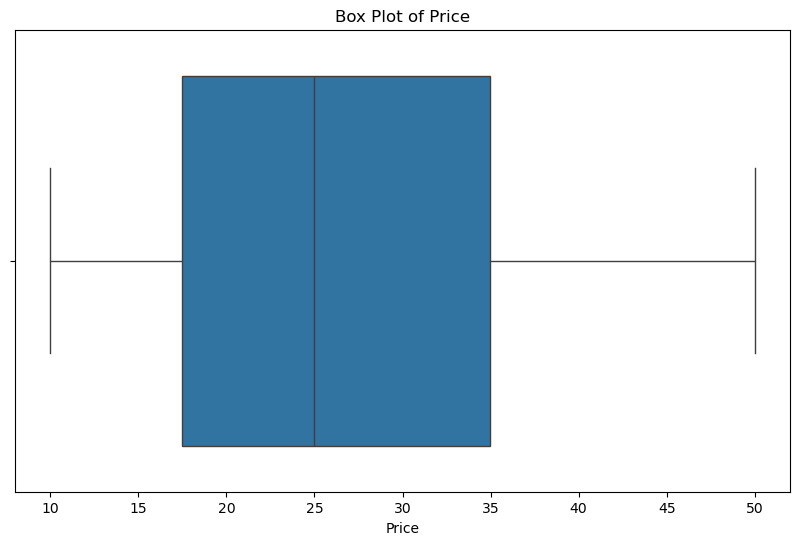

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the specified location
df = pd.read_csv('D:/Projects/Data-cleaning-series/Chapter02 Handling Outliers/Products.csv')

# Display the initial DataFrame
print("Initial DataFrame:")
print(df.to_string(index=False))

# Box plot for the 'Price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.show()

Explanation:

Read the Data: Load the dataset from the specified location using pd.read_csv().

Initial Display: Display the DataFrame to see the data before applying the box plot visualization.

Box Plot: Use the Seaborn library to create a box plot for the 'Price' column. The plot will show the distribution of prices and highlight outliers as points outside the whiskers.

Visualization: Display the box plot using plt.show().

Box plots provide a clear visual representation of data distribution and are a straightforward way to detect and communicate the presence of outliers in a dataset.

2.3.4 Capping

Capping, or Winsorization, is a technique used to limit extreme values in the data to reduce the effect of possible outliers. This method involves setting all data points outside a certain percentile range to the values at those percentiles. It helps in bringing the extreme values closer to the main body of the data.

In [4]:
import pandas as pd
import numpy as np

# Read the data from the specified location
df = pd.read_csv('D:/Projects/Data-cleaning-series/Chapter02 Handling Outliers/Products.csv')

# Display the initial DataFrame
print("Initial DataFrame:")
print(df.to_string(index=False))

# Calculate the 5th and 95th percentiles
lower_cap = df['Price'].quantile(0.05)
upper_cap = df['Price'].quantile(0.95)

# Apply capping to the 'Price' column
df['Price'] = np.where(df['Price'] < lower_cap, lower_cap, df['Price'])
df['Price'] = np.where(df['Price'] > upper_cap, upper_cap, df['Price'])

# Display the DataFrame after capping
print("\nDataFrame After Capping (Winsorization):")
print(df.to_string(index=False))


Initial DataFrame:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          2     Widget B  29.99 Electronics    NaN                      NaN
          3          NaN  15.00  Home Goods   50.0      Durable and stylish
          4     Widget D    NaN  Home Goods  200.0       A versatile widget
          5     Widget E   9.99         NaN   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          7     Widget G    NaN     Kitchen  150.0     Multi-purpose widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
          9     Widget I    NaN Electronics    NaN        Advanced features
         10     Widget J  49.99 Electronics   60.0            Best in class

DataFrame After Capping (Winsorization):
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A 19

Explanation:

Read the Data: Load the dataset from the specified location using pd.read_csv().

Initial Display: Display the DataFrame to see the data before applying capping.

Calculate Percentiles: Compute the 5th and 95th percentiles of the 'Price' column to determine the capping limits.
Apply Capping: Use np.where to set values below the 5th percentile to the 5th percentile value and values above the 95th percentile to the 95th percentile value.

Final Display: Display the DataFrame after applying capping to see the effect of Winsorization.

Capping is an effective way to handle outliers by reducing the influence of extreme values, ensuring that the data remains within a specified range without completely removing those values

2.3.5 Transformation

Transformation involves applying mathematical functions to the data to reduce the impact of outliers. Common transformations include logarithmic, square root, and reciprocal transformations. These techniques can help in stabilizing variance and making the data more normally distributed.

In [5]:
import pandas as pd
import numpy as np

# Read the data from the specified location
df = pd.read_csv('D:/Projects/Data-cleaning-series/Chapter02 Handling Outliers/Products.csv')

# Display the initial DataFrame
print("Initial DataFrame:")
print(df.to_string(index=False))

# Apply logarithmic transformation to the 'Price' column
df['Price_Log'] = np.log1p(df['Price'])

# Display the DataFrame after transformation
print("\nDataFrame After Logarithmic Transformation:")
print(df.to_string(index=False))


Initial DataFrame:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          2     Widget B  29.99 Electronics    NaN                      NaN
          3          NaN  15.00  Home Goods   50.0      Durable and stylish
          4     Widget D    NaN  Home Goods  200.0       A versatile widget
          5     Widget E   9.99         NaN   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          7     Widget G    NaN     Kitchen  150.0     Multi-purpose widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
          9     Widget I    NaN Electronics    NaN        Advanced features
         10     Widget J  49.99 Electronics   60.0            Best in class

DataFrame After Logarithmic Transformation:
 Product ID Product Name  Price    Category  Stock              Description  Price_Log
          1  

Explanation:

Read the Data: Load the dataset from the specified location using pd.read_csv().

Initial Display: Display the DataFrame to see the data before applying transformation.

Logarithmic Transformation: Apply the logarithmic transformation using np.log1p() to the 'Price' column. The log1p function computes the natural logarithm of one plus the input array, effectively handling zero and negative values.

Final Display: Display the DataFrame after applying the logarithmic transformation.

Logarithmic transformation is particularly useful for right-skewed data, as it compresses the range of values and can make the data more normally distributed, thereby reducing the influence of outliers. Other transformations such as square root (np.sqrt()) and reciprocal (1/x) can also be used depending on the specific characteristics of the data.